# FIFA 23 Ultimate Team Players Analysis

<p align="center">
  <img src="https://assetsio.reedpopcdn.com/fifa-23_hosNHHp.jpg?width=1200&height=1200&fit=bounds&quality=70&format=jpg&auto=webp" width = 100%>
</p>

## Table of Contents

1. Define the Problem
2. [Data Collection](#Data-Collection)
3. [Loading and Understanding the Dataset](#Loading-and-Understanding-the-Dataset)
4. [Exploratory Data Analysis (EDA) with Seaborn](#Exploratory-Data-Analysis-(EDA)-with-Seaborn)
5. [Advanced Visualization Techniques](#Advanced-Visualization-Techniques)
6. [Conclusion](#Conclusion)

## 1. Define the Problem 
Understanding the dataset and defining the problem is the foundation for a successful project.

Problem Statement:
Analyze the FIFA 23 Ultimate Team dataset from FUTBIN to derive insights about players' performance metrics, their market value, and other characteristics. The goal is to understand the driving factors behind a player's popularity, market value, and performance.

Given that there are no missing values, we can proceed to the next step of our data exploration: <b>generating descriptive statistics</b>. This will give us a comprehensive understanding of the distribution and characteristics of each feature. Let's examine the statistics for numerical columns in the dataset.

#### Hypothetical Questions:

1. How does a player's rating correlate with their market price?
2. Does the league or club a player is associated with influence their market price?
3. Do players with certain run styles have a higher popularity rating?
4. Are there any trends between a player's skill/weak foot stars and their overall rating?
5. How does the body type of a player influence their performance metrics?
6. Which card version (Rare Gold, ICON, Common Gold) is most popular among players?
7. How do goalkeepers' stats differ from outfield players? Are their market values different?
8. Does a player's attack and defense workrate have an impact on their market price or popularity?
9. Which clubs have the highest average player ratings?
10. Are players from certain nations more skilled (based on the Skills_Star column)?
11. How does the player's position relate to their market price?
12. Are players with a higher attack work rate more popular among the community?
13. Do players with better dribbling skills also tend to have better shooting skills?
14. How does a player's body type or physicality relate to their performance in the game (e.g., pace, shooting)?
15. Which leagues have the most valuable players based on the market price?


## 2. Data Understanding

- Import the necessary libraries
- Load the dataset and understand its structure.
- Check for any missing values.
- Generate descriptive statistics to get an understanding of each feature.

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import folium as fl
import time

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
file_path = "https://raw.githubusercontent.com/diogo-costa-silva/datasets/main/fifa23_players_2023-08-25.csv"
players = pd.read_csv(file_path)

In [3]:
# First and last 5 players of the dataset
players

,Name,Club,Nation,League,Rating,Main_Position,Alternate_Positions,Card_Version,Run_Style,Price,...,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,Height,BodyType,Popularity,Base_Stats,Ingame_Stats
0,Pelé,FUT ICONS,Brazil,Icons,99,LW,"RM,LM,RW",Shapeshifters ICON,Explosive,2570000.0,...,97,94,99,61,78,"173cm | 5'8""",Unique (70kg),2639,525,2557
1,Kevin De Bruyne,Manchester City,Belgium,Premier League,99,CM,CAM,Level Up Obj,Controlled,0.0,...,95,99,97,91,99,"181cm | 5'11""",Unique (70kg),684,569,2743
2,Cristiano Ronaldo,Al Nassr,Portugal,MBS Pro League (SAU 1),99,ST,"CF,LW",Futties Premium,Controlled,0.0,...,99,93,97,41,88,"187cm | 6'2""",CR7 (83kg),3130,515,2499
3,Lionel Messi,Inter Miami CF,Argentina,Major League Soccer,99,ST,"RM,RW",Futties Premium,Controlled,11990000.0,...,98,99,99,41,81,"169cm | 5'7""",Messi (67kg),1928,513,2506
4,Neymar Jr,Paris SG,Brazil,Ligue 1,99,CAM,"LM,LW",Futties,Explosive,5300000.0,...,96,95,99,50,78,"175cm | 5'9""",Neymar (68kg),911,517,2531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,Singh,Jamshedpur FC,India,Indian Super League (IND 1),46,RM,RW,Normal,Controlled,0.0,...,42,40,47,25,50,"172cm | 5'8""",Lean (71kg),18,272,1240
7287,Nathan Logue,Finn Harps,Republic of Ireland,SSE Airtricity League (IRL 1),46,CM,0,Normal,Controlled,1200.0,...,37,45,48,41,49,"178cm | 5'10""",Lean (72kg),15,270,1285
7288,Devansh Dabas,Chennaiyin FC,India,Indian Super League (IND 1),46,GK,0,Normal,Controlled,4800.0,...,42,47,48,28,51,"182cm | 6'0""",Average (80kg),30,261,627
7289,Biswa Darjee,Bengaluru FC,India,Indian Super League (IND 1),46,CM,CAM,Normal,Controlled,300.0,...,39,45,47,41,57,"170cm | 5'7""",Short & Lean- (65kg),6,295,1377


In [4]:
# columns list
players.columns

Index(['Name', 'Club', 'Nation', 'League', 'Rating', 'Main_Position',
       'Alternate_Positions', 'Card_Version', 'Run_Style', 'Price',
       'Price_Variation', 'Skills_Star', 'Weak_Foot_Star', 'Attack_Workrate',
       'Defense_Workrate', 'Pace / Diving', 'Shooting / Handling',
       'Passing / Kicking', 'Dribbling / Reflexes', 'Defense / Speed',
       'Physical / Positioning', 'Height', 'BodyType', 'Popularity',
       'Base_Stats', 'Ingame_Stats'],
      dtype='object')

In [5]:
data_types = players.info()
data_types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    7291 non-null   object 
 1   Club                    7291 non-null   object 
 2   Nation                  7291 non-null   object 
 3   League                  7291 non-null   object 
 4   Rating                  7291 non-null   int64  
 5   Main_Position           7291 non-null   object 
 6   Alternate_Positions     7291 non-null   object 
 7   Card_Version            7291 non-null   object 
 8   Run_Style               7291 non-null   object 
 9   Price                   7291 non-null   float64
 10  Price_Variation         7291 non-null   object 
 11  Skills_Star             7291 non-null   int64  
 12  Weak_Foot_Star          7291 non-null   int64  
 13  Attack_Workrate         7291 non-null   object 
 14  Defense_Workrate        7291 non-null   

In [6]:
data_shape = players.shape
data_shape

(7291, 26)

In [7]:
# Check for missing values in each column
missing_values = players.isnull().sum()
missing_values

Name                      0
Club                      0
Nation                    0
League                    0
Rating                    0
Main_Position             0
Alternate_Positions       0
Card_Version              0
Run_Style                 0
Price                     0
Price_Variation           0
Skills_Star               0
Weak_Foot_Star            0
Attack_Workrate           0
Defense_Workrate          0
Pace / Diving             0
Shooting / Handling       0
Passing / Kicking         0
Dribbling / Reflexes      0
Defense / Speed           0
Physical / Positioning    0
Height                    0
BodyType                  0
Popularity                0
Base_Stats                0
Ingame_Stats              0
dtype: int64

In [8]:
# Checking the number of unique values in each column
unique_values = players.nunique()
unique_values

Name                      6500
Club                       678
Nation                     139
League                      48
Rating                      54
Main_Position               15
Alternate_Positions        197
Card_Version               157
Run_Style                    3
Price                      411
Price_Variation            383
Skills_Star                  6
Weak_Foot_Star               6
Attack_Workrate              3
Defense_Workrate             3
Pace / Diving               71
Shooting / Handling         81
Passing / Kicking           74
Dribbling / Reflexes        71
Defense / Speed             83
Physical / Positioning      67
Height                      47
BodyType                   297
Popularity                 813
Base_Stats                 311
Ingame_Stats              1641
dtype: int64

#### Data Understanding Summary:

Shape of the Dataset:
- Rows: 7,291
- Columns: 26

Data Types:
- The dataset contains a mix of data types, including objects (strings), integers, and floats.
- There are some variables that seem to have a different data type than expected:
  - `Price_Variation` is object but it should be int or float.
  - `Pace / Diving` is float but the rest of the stats columns are int.
  - `Height` is object.

Missing Values:
- There are no missing values in any of the columns.



In [9]:
# Extracting detailed information on the specified columns
price_variation_info = players["Price_Variation"].unique()
pace_diving_info = players["Pace / Diving"].unique()
height_info = players["Height"].unique()
bodytype_info = players["BodyType"].unique()

price_variation_info[:10], pace_diving_info[:10], height_info[:10], bodytype_info[:10]

(array(['3.13%', '0', '62.03%', '3.93%', '2.18%', '5.46%', '1.33%',
        '4.61%', '0.71%', '4.32%'], dtype=object),
 array([96., 88., 97., 95., 99., 92., 93., 90., 94., 87.]),
 array(['173cm | 5\'8"', '181cm | 5\'11"', '187cm | 6\'2"',
        '169cm | 5\'7"', '175cm | 5\'9"', '182cm | 6\'0"', '185cm | 6\'1"',
        '186cm | 6\'1"', '183cm | 6\'0"', '172cm | 5\'8"'], dtype=object),
 array(['Unique  (70kg)', 'CR7  (83kg)', 'Messi  (67kg)', 'Neymar  (68kg)',
        'Unique  (73kg)', 'Average  (77kg)', 'Average  (81kg)',
        'High & Average+  (75kg)', 'Lean  (70kg)', 'Unique  (81kg)'],
       dtype=object))

Based on the detailed analysis of the specified columns:

`Price_Variation`:

This column contains percentage values represented as strings (e.g., '3.13%'). We need to convert these into numeric format for further analysis.

`Pace / Diving`:

The values in this column are floats and range from 87 to 99 for the first ten values we've observed.

`Height`:

This column contains height in two formats: centimeters (e.g., '173cm') and feet-inches (e.g., '5'8"'). To standardize this, we can split this into two separate columns or convert the entire height into one consistent metric.

`BodyType`:

With 297 unique values, this column seems to contain specific descriptions based on the player's height and weight (e.g., 'Average (75kg)'). We can see that there are categories like 'Average (75kg)', 'Average (70kg)', etc. We need to decide how we want to handle this column, whether we want to extract only the general body type (like 'Average' or 'Lean') or also consider the weight.

## 3. Data Cleaning:

- Handle missing values.
- Convert categorical features if needed.
- Resolve any inconsistencies in the data.
  
To proceed with data cleaning, we'll:

1. Convert Price_Variation to numeric by removing the '%' sign.
2. Decide on a consistent metric for the Height column and implement it.
3. Extract general body types from the BodyType column.

In [10]:
# Convert Price_Variation to numeric by removing the '%' sign and converting to float
players["Price_Variation"] = players["Price_Variation"].str.replace('%', '').astype(float)


# Convert Height to consistent metric (centimeters) and create a new column for it
players["Height_cm"] = players["Height"].str.split("|").str[0].str.replace('cm', '').astype(int)

# Convert Height to inches and create a new column for it
players["Height_inches"] = players["Height"].str.split("|").str[1].str.replace('"', '').str.strip().apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]))


# Extract weight from the BodyType column and create a new column for it
players["Weight_kg"] = players["BodyType"].str.extract('(\d+)').astype(float)

# Extract general body types from the BodyType column
players["BodyType"] = players["BodyType"].str.split(" ").str[0]



# Display the first few rows of the modified dataset for the specific columns
players[["Price_Variation", "Height_cm", "Height_inches", "BodyType", "Weight_kg"]].head()

,Price_Variation,Height_cm,Height_inches,BodyType,Weight_kg
0,3.13,173,68,Unique,70.0
1,0.00,181,71,Unique,70.0
2,0.00,187,74,CR7,7.0
3,62.03,169,67,Messi,67.0
4,3.93,175,69,Neymar,68.0


Here's the result of our data cleaning for the specified columns:

Price_Variation:
- The '%' sign has been removed, and the column has been converted to a float data type.

Height_cm:
- We've created a new column Height_cm that represents the height of players in centimeters.

Height_inches:
- We've created a new column that represents the height of players in inches.

Weight_kg:
- We've extracted the weight from the original BodyType column and stored it in this new column.

BodyType:
- This column now only contains the general descriptor of the body type. However, we still have unique identifiers like "Unique", "CR7", "Messi", and "Neymar". 

Let's see which is the best approch, if these can be grouped into a generic category or handled separately.

In [11]:
# Display the value counts of the modified BodyType column
bodytype_counts = players["BodyType"].value_counts()

bodytype_counts

High        2581
Average     2383
Lean        1489
Short        379
Stocky       227
Unique       203
Normal        12
CR7            4
Messi          4
Neymar         3
R9             2
Shaqiri        2
Base           1
Courtois       1
Name: BodyType, dtype: int64

In [12]:
# Grouping unique identifiers into the "Unique" category
unique_identifiers = ["Unique", "CR7", "Messi", "Neymar", "R9", "Shaqiri", "Courtois"]
players["BodyType"] = players["BodyType"].apply(lambda x: "Unique" if x in unique_identifiers else x)

# Display the value counts of the modified BodyType column
bodytype_counts = players["BodyType"].value_counts()

bodytype_counts

High       2581
Average    2383
Lean       1489
Short       379
Stocky      227
Unique      219
Normal       12
Base          1
Name: BodyType, dtype: int64

Now that we made some pre-processing to the dataset, we can proceed to the next step of our data exploration: <b>generating descriptive statistics</b>. 
This will give us a comprehensive understanding of the distribution and characteristics of each feature. Let's examine the statistics for numerical columns in the dataset.

In [13]:
# Generating descriptive statistics for numerical columns
numerical_stats = players.describe()
numerical_stats

,Rating,Price,Price_Variation,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,Popularity,Base_Stats,Ingame_Stats,Height_cm,Height_inches,Weight_kg
count,7291.000000,7.291000e+03,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7279.000000
mean,69.508984,1.322194e+04,3.271547,2.083802,3.045261,70.815115,57.679879,61.754355,66.799342,52.870662,67.844877,109.099575,377.765464,1680.697984,181.830887,71.599506,75.347575
std,9.666299,1.998951e+05,13.723417,1.398794,0.746190,12.192583,15.935866,12.195375,11.669367,17.576293,10.621687,593.091606,54.783929,400.322290,6.842561,2.694977,7.655780
min,46.000000,0.000000e+00,0.000000,0.000000,0.000000,28.000000,18.000000,26.000000,29.000000,15.000000,30.000000,-8851.000000,242.000000,536.000000,156.000000,61.000000,0.000000
25%,63.000000,3.000000e+02,0.000000,0.000000,3.000000,64.000000,47.000000,54.000000,60.000000,38.000000,61.000000,0.000000,340.000000,1517.000000,177.000000,70.000000,70.000000
50%,68.000000,4.000000e+02,0.000000,2.000000,3.000000,71.000000,59.000000,61.000000,66.000000,56.000000,68.000000,2.000000,371.000000,1712.000000,182.000000,72.000000,75.000000
75%,75.000000,1.200000e+03,2.000000,3.000000,3.000000,79.000000,68.000000,69.000000,74.000000,66.000000,75.000000,8.000000,408.000000,1906.000000,187.000000,74.000000,80.000000
max,99.000000,1.199000e+07,488.240000,5.000000,5.000000,99.000000,99.000000,99.000000,99.000000,98.000000,99.000000,21348.000000,569.000000,2752.000000,206.000000,81.000000,105.000000


Here are the key insights from the descriptive statistics of the numerical columns:

Here are the key insights from the descriptive statistics of the numerical columns after the preprocessing:


`Rating`:
- Range: 46 to 99
- Average rating: ~69.5
- Most players have a rating between 63 and 75 (25th to 75th percentile).

`Price`:
- Range: 0 to 11,990,000
- The vast majority of players have a price between 300 and 1,200 (25th to 75th percentile).

`Skills_Star` and `Weak_Foot_Star`:
- Skills range: 0 to 5
- Weak foot range: 0 to 5
- Most players have around 2 skills stars and 3 weak foot stars.

`Pace / Diving`:
- Range: 28 to 99
- Average pace/diving: ~70.8

Other Stats:
- These stats generally range between low values to a maximum of 99.
- The average for most of these stats lies around the mid-60s to the high 60s.

`Popularity`:
- This is interesting as the minimum value is -8,851, which might mean there are more dislikes than likes for certain players.
- The maximum popularity is 21,348.

`Base Stats`and `In-game Stats`:
- Range for Base Stats: 242 to 569
- Range for In-game Stats: 536 to 2752

`Height` and `Weight`:
- Height (in cm) ranges from 156 cm to 206 cm.
- Height (in inches) ranges from 61 inches to 81 inches.
- Weight data seems to be incorrectly extracted with only 6 non-null values ranging from 7 kg to 9 kg. This indicates an issue with our extraction from the BodyType column that needs further investigation.

With this detailed view, we can better understand the distribution and characteristics of the players in the dataset. We'll need to address the issue with the Weight_kg column before proceeding further. 

In [14]:
# Imputing the missing values in Weight_kg using the global median
global_median_weight = players["Weight_kg"].median()
players["Weight_kg"].fillna(global_median_weight, inplace=True)

# Check if there are any more missing values in the Weight_kg column
missing_weight_after_global_imputation = players["Weight_kg"].isnull().sum()

missing_weight_after_global_imputation

0

## 4. Data Visualization:

- Visualize the distribution of important features such as Rating, Price, Popularity, etc.
- Explore correlations between variables using heatmaps or scatter plots.
- Use bar graphs or pie charts for categorical features like Card Version or League.

#### Outlier detection

In [15]:
# Calculating IQR for each numerical column
Q1 = players.quantile(0.25)
Q3 = players.quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = ((players < lower_bound) | (players > upper_bound)).sum()

outliers[outliers > 0].sort_values(ascending=False)


Weak_Foot_Star            3124
Price                     1582
Popularity                1335
Price_Variation            972
Ingame_Stats               719
Pace / Diving              151
Base_Stats                 143
Dribbling / Reflexes       113
Passing / Kicking          105
Rating                     100
Weight_kg                   51
Physical / Positioning      40
Height_cm                   13
Height_inches                9
dtype: int64

Based on the IQR method, we've detected the following columns with potential outliers:

- Weak_Foot_Star: 3,124 potential outliers
- Price: 1,582 potential outliers
- Popularity: 1,335 potential outliers
- Price_Variation: 972 potential outliers
- Ingame_Stats: 719 potential outliers
- Pace / Diving: 151 potential outliers
- Base_Stats: 143 potential outliers
- Dribbling / Reflexes: 113 potential outliers
- Passing / Kicking: 105 potential outliers
- Rating: 100 potential outliers
- Physical / Positioning: 40 potential outliers
- Height_cm: 13 potential outliers
- Height_inches: 9 potential outliers
- Weight_kg: 2 potential outliers

It's essential to note that outliers aren't necessarily errors or mistakes. They can represent genuine extreme values. For instance, a very popular player could naturally have a much higher price, which might be considered an outlier compared to other players but is valid data.

The next steps would be:

- Visual Examination: We can visually inspect the data using box plots or scatter plots to see the spread of data and identify potential outliers.
- Contextual Analysis: Understand the context. For instance, a very high price for a highly-rated player might be justified.
- Decision: Decide whether to keep, remove, or adjust these outliers based on the analysis and objectives.

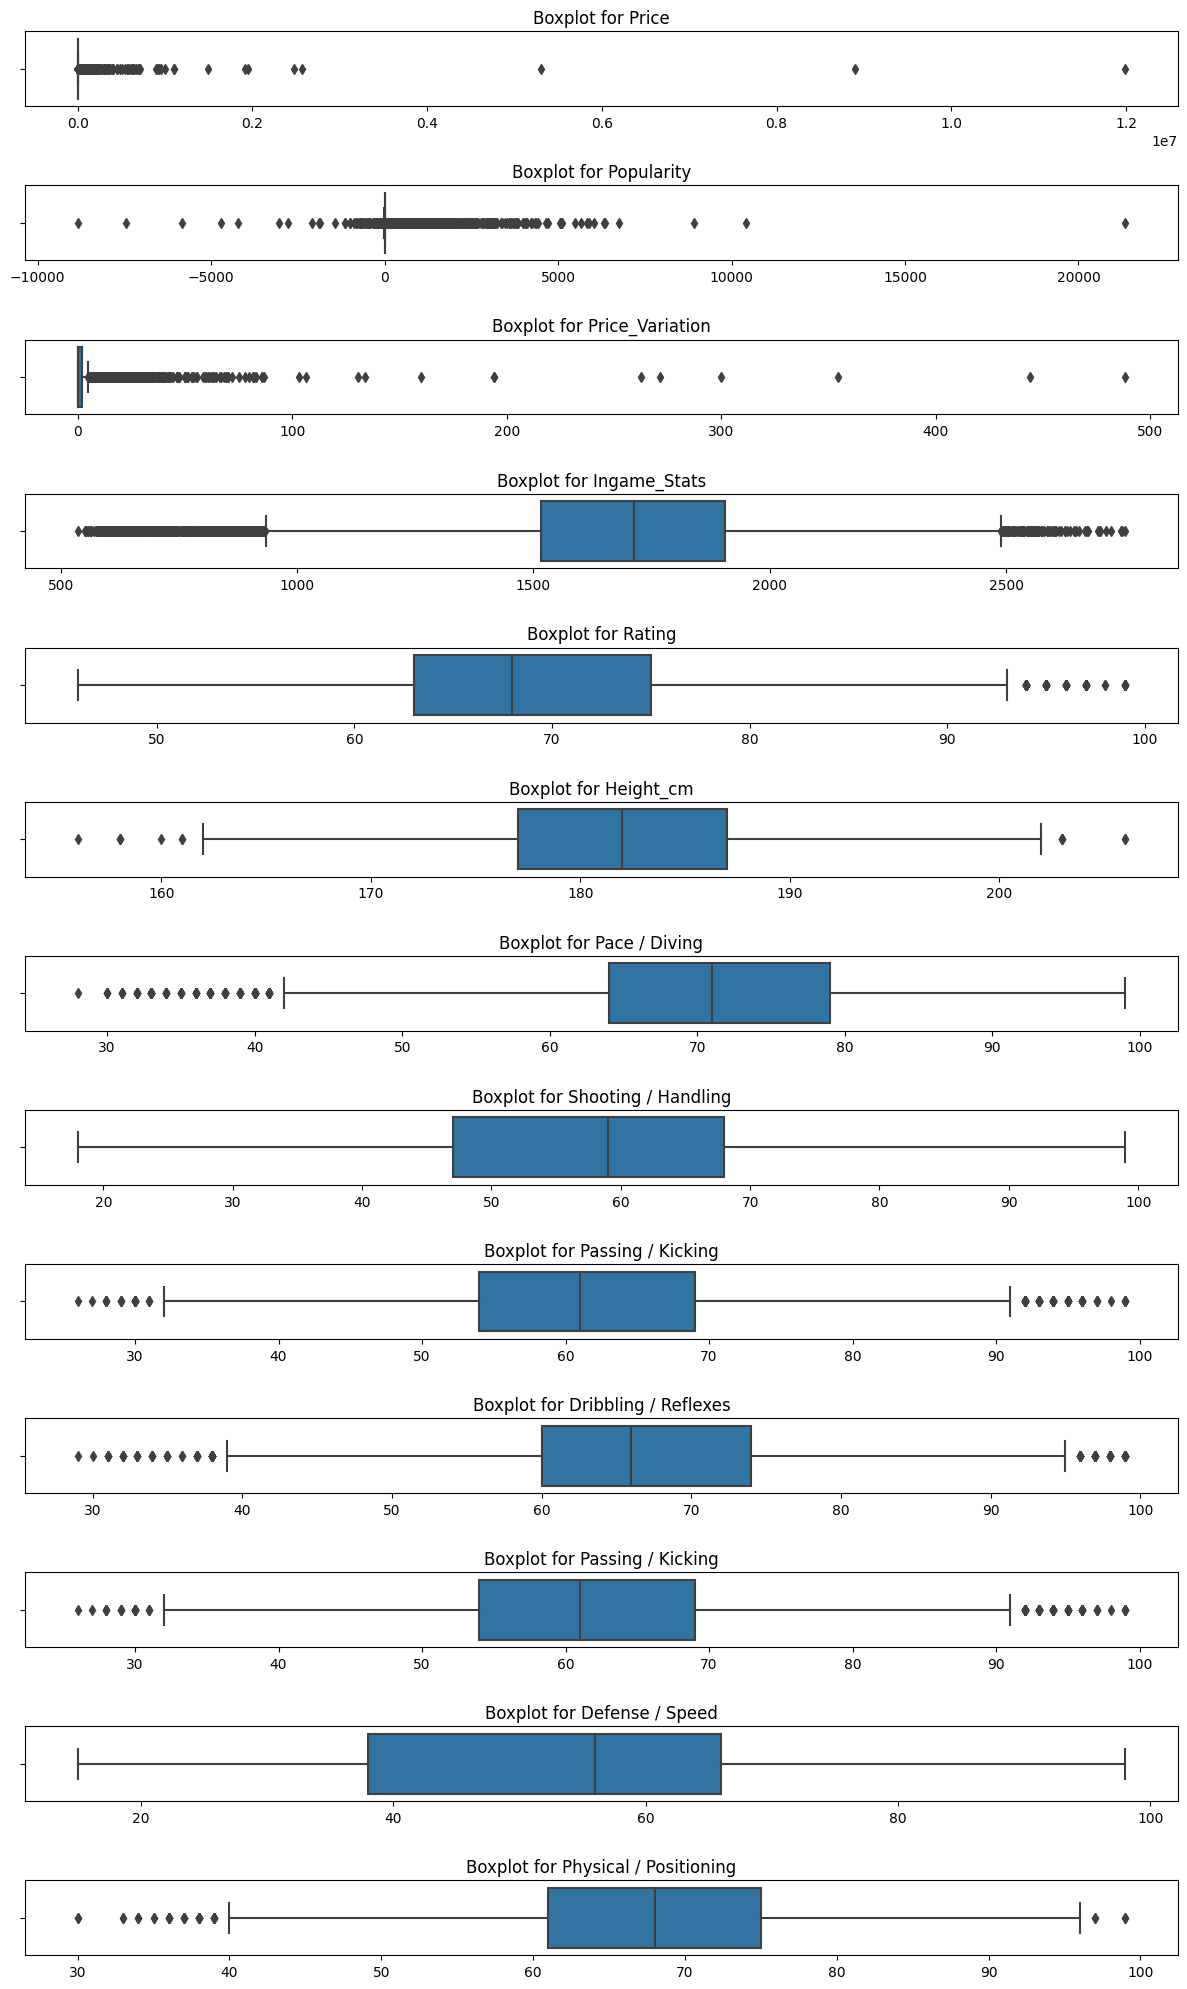

In [18]:
# Selecting a subset of columns to visualize
columns_to_visualize = [ "Price", "Popularity", "Price_Variation", "Ingame_Stats", "Rating", "Height_cm", 
                        "Pace / Diving", "Shooting / Handling", "Passing / Kicking", "Dribbling / Reflexes", "Passing / Kicking", "Defense / Speed" , "Physical / Positioning"]

# Setting up the figure and axes
fig, axes = plt.subplots(len(columns_to_visualize), 1, figsize=(12, 20))

# Generating box plots for each column
for ax, column in zip(axes, columns_to_visualize):
    sns.boxplot(x=players[column], ax=ax)
    ax.set_title(f"Boxplot for {column}")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

Weak_Foot_Star: The majority of players have a rating between 2 and 4, with a few players having a rating of 5, which is considered as potential outliers.

Price: There's a significant spread in player prices, with a majority clustered at the lower end. There are numerous outliers, representing players with exceptionally high prices, which are likely top-rated or popular players.

Popularity: Most players have popularity values close to 0, but there are many outliers, both on the positive and negative side. These represent players who are either exceptionally liked or disliked by the community.

Price_Variation: Most players have a price variation close to 0, but there are outliers that indicate significant price changes either positively or negatively.

Ingame_Stats: The distribution is relatively tight, with a few outliers on the higher end. These outliers represent players with exceptionally high in-game stats.

Rating: Players' ratings are mostly clustered between 60 and 80, with a few players having exceptionally high or low ratings.

These visualizations help us understand the distribution of data in each column and the potential outliers. Before making decisions on how to handle these outliers, it's essential to consider the context. For instance, players with high prices might be top-rated players in the game, and it would make sense for them to have higher prices compared to others.

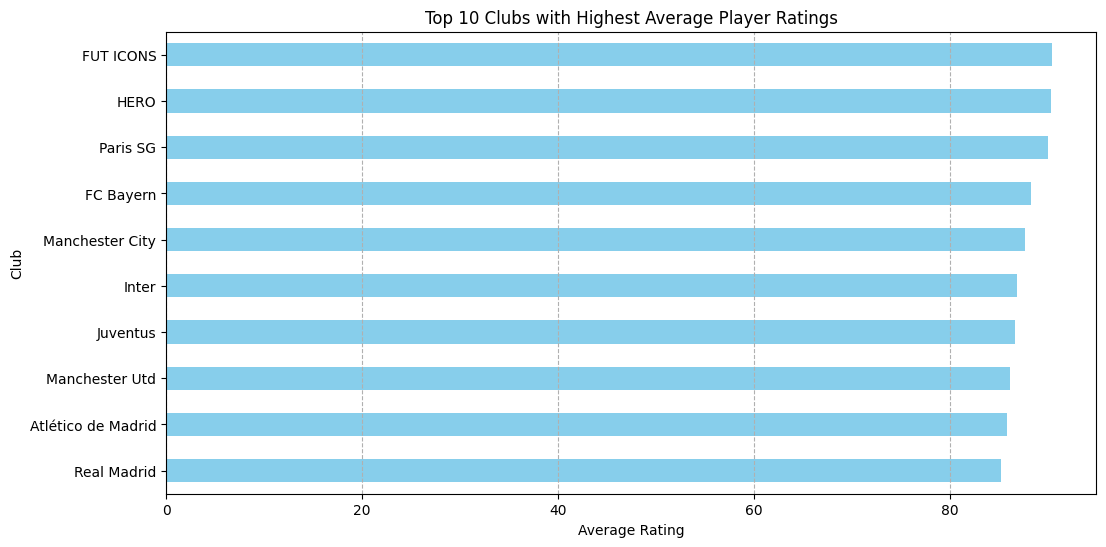

In [20]:
# Visualization for the first question: "Which clubs have the highest average player ratings?"

# Calculating average ratings for each club
club_avg_ratings = players.groupby('Club')['Rating'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
club_avg_ratings.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Clubs with Highest Average Player Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Club")
plt.grid(axis='x', linestyle='--')

plt.show()

## 5. Feature Engineering:

- Derive new features if necessary.
- Encode categorical features for modeling.
- Normalize/standardize numerical features if needed.

## 7. Modeling:

- Choose appropriate models based on the type of questions and nature of data. For instance:
- Regression models for predicting player price.
- Classification models for predicting card version.
- Split the data into training and test sets.
- Train the model on the training data and evaluate its performance on the test set.

## 8. Model Evaluation:

- Use appropriate metrics for evaluation, like:
- RMSE for regression problems.
- Accuracy, precision, recall, etc., for classification problems.
- Adjust model parameters or try different models if necessary.


## 9. Interpretation and Reporting:

- Answer the hypothetical questions based on model results and data analysis.
- Provide recommendations or insights that can be useful for players, clubs, or businesses associated with FIFA Ultimate Team.


## 10. Deployment (Optional):
If required, create an interactive tool or dashboard that allows users to input player attributes and get predictions or insights.